In [2]:
# MacOS
!pip install numpy matplotlib torch torchvision torchaudio

In [3]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [4]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...


/opt/miniconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [6]:
len(dataset)

60000

In [8]:
test_data = MNIST(root='data/', train=False)
len(test_data)

10000

In [9]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x12498E3A0>, 5)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


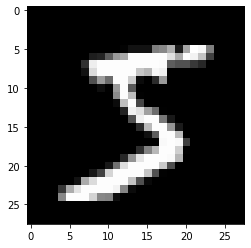

In [14]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [15]:
import torchvision.transforms as transforms

In [16]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [17]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [18]:
print(img_tensor[0,10:15,10:15])

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


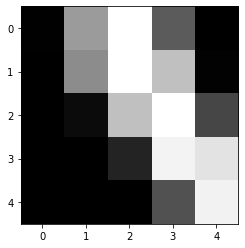

In [19]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [20]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [50]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(train_ds, batch_size)

In [51]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#Logistic regression model
model = nn.Linear(input_size, num_classes)

In [24]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0235, -0.0052, -0.0327,  ..., -0.0084, -0.0155,  0.0271],
        [-0.0218, -0.0192, -0.0065,  ..., -0.0057,  0.0337,  0.0116],
        [-0.0221, -0.0213,  0.0302,  ..., -0.0097, -0.0276,  0.0241],
        ...,
        [-0.0006, -0.0164, -0.0173,  ..., -0.0048,  0.0352, -0.0058],
        [ 0.0291, -0.0081,  0.0107,  ..., -0.0164, -0.0243,  0.0190],
        [-0.0223, -0.0176, -0.0121,  ..., -0.0055,  0.0237,  0.0295]],
       requires_grad=True)

In [25]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0301, -0.0098, -0.0007, -0.0041,  0.0026,  0.0275, -0.0169, -0.0225,
        -0.0086, -0.0199], requires_grad=True)

In [27]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([7, 2, 7, 9, 6, 1, 2, 8, 6, 8, 4, 9, 4, 0, 0, 9, 8, 4, 8, 6, 7, 6, 1, 6,
        2, 6, 5, 7, 9, 0, 8, 7, 4, 6, 9, 0, 9, 8, 6, 7, 8, 0, 9, 1, 3, 1, 6, 4,
        5, 3, 2, 3, 6, 6, 4, 9, 1, 0, 8, 7, 6, 0, 4, 7, 4, 6, 3, 6, 8, 6, 6, 1,
        4, 1, 8, 2, 3, 6, 4, 5, 5, 9, 2, 7, 3, 3, 0, 0, 8, 3, 1, 6, 9, 7, 4, 6,
        4, 0, 0, 0, 7, 9, 0, 0, 1, 5, 5, 4, 7, 4, 7, 7, 2, 3, 0, 7, 5, 3, 0, 6,
        6, 6, 4, 1, 5, 6, 9, 3])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [28]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [29]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
     
    # forward method is invoked when we pass a batch of inputs to the model
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [30]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [32]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0124, -0.0321,  0.0226,  ...,  0.0107,  0.0227,  0.0315],
         [-0.0295, -0.0251, -0.0186,  ..., -0.0170,  0.0157, -0.0005],
         [-0.0205, -0.0118, -0.0256,  ...,  0.0126,  0.0114, -0.0149],
         ...,
         [-0.0091, -0.0164, -0.0296,  ...,  0.0012, -0.0342, -0.0005],
         [ 0.0020,  0.0179, -0.0304,  ...,  0.0199,  0.0263,  0.0262],
         [ 0.0004, -0.0078, -0.0219,  ..., -0.0332, -0.0093, -0.0065]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0112,  0.0215,  0.0179,  0.0098, -0.0285, -0.0207,  0.0222, -0.0224,
          0.0029, -0.0093], requires_grad=True)]

In [33]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0454, -0.0079, -0.2750, -0.2935, -0.2856,  0.1643, -0.1554, -0.1589,
         -0.1250,  0.0548],
        [-0.1585, -0.0311,  0.0347, -0.2111, -0.1739,  0.2175, -0.3452, -0.0431,
         -0.2144, -0.0868]])


In [35]:
import torch.nn.functional as F

# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1058, 0.1099, 0.0841, 0.0826, 0.0832, 0.1305, 0.0948, 0.0945, 0.0977,
         0.1170],
        [0.0934, 0.1060, 0.1133, 0.0886, 0.0919, 0.1360, 0.0775, 0.1048, 0.0883,
         0.1003]])
Sum:  1.0000001192092896


In [36]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 5, 2, 5, 8, 9, 5, 5, 2, 9, 0, 5, 8, 5, 0, 9, 2, 9, 4, 6, 5, 9, 7, 5,
        9, 5, 2, 9, 5, 9, 5, 7, 5, 9, 5, 5, 9, 7, 2, 2, 5, 0, 7, 2, 5, 5, 2, 5,
        7, 0, 0, 5, 7, 5, 7, 2, 2, 7, 2, 0, 5, 7, 5, 5, 5, 5, 9, 5, 9, 5, 5, 1,
        5, 5, 1, 7, 5, 5, 5, 9, 5, 0, 5, 7, 5, 5, 0, 9, 0, 5, 5, 9, 5, 5, 2, 7,
        7, 5, 2, 2, 2, 5, 2, 0, 9, 5, 4, 5, 2, 9, 5, 2, 5, 5, 0, 9, 9, 5, 0, 9,
        7, 8, 5, 0, 0, 9, 9, 4])
tensor([0.1305, 0.1360, 0.1363, 0.1316, 0.1177, 0.1240, 0.1333, 0.1272, 0.1373,
        0.1228, 0.1412, 0.1357, 0.1194, 0.1500, 0.1580, 0.1253, 0.1465, 0.1240,
        0.1148, 0.1244, 0.1284, 0.1651, 0.1444, 0.1428, 0.1289, 0.1332, 0.1373,
        0.1222, 0.1260, 0.1148, 0.1202, 0.1237, 0.1248, 0.1220, 0.1192, 0.1448,
        0.1469, 0.1141, 0.1328, 0.1143, 0.1283, 0.1673, 0.1385, 0.1267, 0.1239,
        0.1276, 0.1567, 0.1224, 0.1268, 0.1188, 0.1233, 0.1334, 0.1349, 0.1188,
        0.1350, 0.1153, 0.1262, 0.1285, 0.1370, 0.1194, 0.1340, 0.1152, 0.1251,
       

In [37]:
labels

tensor([8, 8, 0, 5, 6, 3, 4, 1, 9, 1, 9, 8, 2, 0, 2, 6, 3, 1, 8, 5, 7, 6, 5, 8,
        5, 4, 9, 1, 9, 8, 8, 0, 3, 6, 9, 7, 5, 3, 2, 5, 1, 4, 0, 6, 0, 1, 0, 9,
        0, 3, 2, 5, 0, 4, 0, 9, 0, 0, 2, 9, 2, 0, 9, 1, 7, 4, 7, 5, 1, 8, 1, 1,
        9, 4, 1, 3, 7, 8, 8, 6, 9, 2, 9, 5, 9, 6, 3, 7, 3, 3, 2, 6, 1, 4, 2, 7,
        0, 4, 8, 7, 4, 8, 6, 2, 0, 1, 8, 7, 9, 1, 8, 0, 4, 4, 9, 1, 7, 3, 4, 1,
        3, 4, 7, 6, 6, 6, 6, 8])

In [38]:
outputs[:2]

tensor([[-0.0454, -0.0079, -0.2750, -0.2935, -0.2856,  0.1643, -0.1554, -0.1589,
         -0.1250,  0.0548],
        [-0.1585, -0.0311,  0.0347, -0.2111, -0.1739,  0.2175, -0.3452, -0.0431,
         -0.2144, -0.0868]], grad_fn=<SliceBackward>)

In [39]:
torch.sum(preds == labels)

tensor(9)

In [40]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [41]:
accuracy(outputs, labels)

tensor(0.0703)

In [42]:
probs

tensor([[0.1058, 0.1099, 0.0841,  ..., 0.0945, 0.0977, 0.1170],
        [0.0934, 0.1060, 0.1133,  ..., 0.1048, 0.0883, 0.1003],
        [0.1005, 0.1050, 0.1363,  ..., 0.0987, 0.0817, 0.0953],
        ...,
        [0.0810, 0.0919, 0.1335,  ..., 0.0953, 0.1033, 0.1355],
        [0.1121, 0.0954, 0.1032,  ..., 0.0902, 0.1034, 0.1149],
        [0.1016, 0.1061, 0.0839,  ..., 0.1001, 0.0986, 0.0995]],
       grad_fn=<SoftmaxBackward>)

In [43]:
outputs

tensor([[-0.0454, -0.0079, -0.2750,  ..., -0.1589, -0.1250,  0.0548],
        [-0.1585, -0.0311,  0.0347,  ..., -0.0431, -0.2144, -0.0868],
        [-0.0390,  0.0046,  0.2656,  ..., -0.0569, -0.2464, -0.0923],
        ...,
        [-0.3635, -0.2373,  0.1369,  ..., -0.2004, -0.1195,  0.1518],
        [ 0.1038, -0.0579,  0.0210,  ..., -0.1135,  0.0228,  0.1284],
        [-0.0571, -0.0140, -0.2487,  ..., -0.0721, -0.0874, -0.0779]],
       grad_fn=<AddmmBackward>)

In [44]:
loss_fn = F.cross_entropy

In [45]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3313, grad_fn=<NllLossBackward>)


In [46]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [47]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [53]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [54]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.333956003189087, 'val_acc': 0.07497202605009079}

In [59]:
history1 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4606, val_acc: 0.8818
Epoch [1], val_loss: 0.4446, val_acc: 0.8853
Epoch [2], val_loss: 0.4316, val_acc: 0.8871
Epoch [3], val_loss: 0.4209, val_acc: 0.8896
Epoch [4], val_loss: 0.4116, val_acc: 0.8908


In [60]:
history2 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4038, val_acc: 0.8923
Epoch [1], val_loss: 0.3969, val_acc: 0.8939
Epoch [2], val_loss: 0.3908, val_acc: 0.8956
Epoch [3], val_loss: 0.3853, val_acc: 0.8966
Epoch [4], val_loss: 0.3804, val_acc: 0.8977


In [61]:
history3 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.3760, val_acc: 0.8984
Epoch [1], val_loss: 0.3720, val_acc: 0.8995
Epoch [2], val_loss: 0.3683, val_acc: 0.9002
Epoch [3], val_loss: 0.3648, val_acc: 0.9013
Epoch [4], val_loss: 0.3617, val_acc: 0.9017


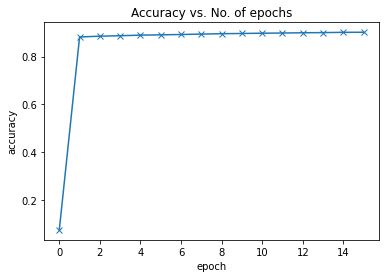

In [62]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [63]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


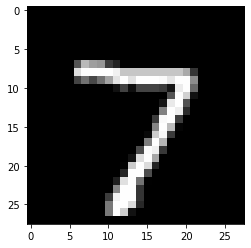

In [64]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [66]:
# img.unsqueeze simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor

def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


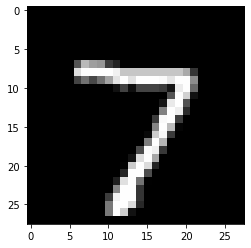

In [67]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


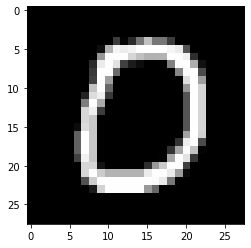

In [68]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


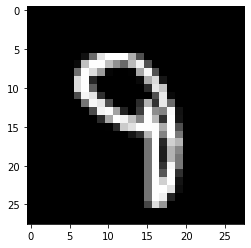

In [69]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


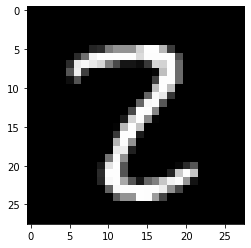

In [70]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [71]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.34057778120040894, 'val_acc': 0.9078124761581421}

In [72]:
# I expect this to be similar to the accuracy/loss on the validation set.